# Análise da variação dos produtos no tempo

In [1]:
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura dos arquivos disponíveis na pasta

In [2]:
arquivos = os.listdir('dados/mon_completa/mon/mon')
arquivos

['mon 01-04.XLSX',
 'mon 01-05.XLSX',
 'mon 02-04.XLSX',
 'mon 02-05.XLSX',
 'mon 03-05.XLSX',
 'mon 04-04.XLSX',
 'mon 05-04.XLSX',
 'mon 06-04.XLSX',
 'mon 06-05.XLSX',
 'mon 07-04.XLSX',
 'mon 08-04.XLSX',
 'mon 11-04.XLSX',
 'mon 11-05.XLSX',
 'mon 12-04.XLSX',
 'mon 12-05.XLSX',
 'mon 13-04.XLSX',
 'mon 13-05.XLSX',
 'mon 14-04.XLSX',
 'mon 14-05.XLSX',
 'mon 16-05.XLSX',
 'mon 17-05.XLSX',
 'mon 18-04.xlsx',
 'mon 18-05.XLSX',
 'mon 19-04.XLSX',
 'mon 19-05.XLSX',
 'mon 20-04.XLSX',
 'mon 20-05.XLSX',
 'mon 23-05.XLSX',
 'mon 24-05.XLSX',
 'mon 25-03.XLSX',
 'mon 25-04.XLSX',
 'mon 25-05.XLSX',
 'mon 26-04.XLSX',
 'mon 26-05.XLSX',
 'mon 27-04.XLSX',
 'mon 27-05.XLSX',
 'mon 28-04.XLSX',
 'mon 29-03.XLSX',
 'mon 30-03.XLSX',
 'mon 31-03.XLSX']

In [3]:
for i in range(0,len(arquivos)):
    path = 'dados/mon_completa/mon/mon/'+arquivos[i]
#    print(path)
    c_time = time.strftime("%d/%m/%Y", time.strptime(time.ctime(os.path.getmtime(path))))
#    print(c_time)

In [4]:
arquivos[1][4:6] + '/' +arquivos[1][7:9] + '/2022'

'01/05/2022'

### Utilizando o 'for' para ler todos os arquivos da pasta e criar um array com os dados

In [5]:
lista = []

for n in range(0,len(arquivos)):
    path = 'dados/mon_completa/mon/mon/'+arquivos[n]
    #c_time = time.strftime("%d/%m/%Y", time.strptime(time.ctime(os.path.getmtime(path))))
    locals()['dados%s' %n] = pd.read_excel(path,usecols=('B,I'))
    locals()['dados%s' %n]['data'] = arquivos[n][4:6] + '/' +arquivos[n][7:9] + '/2022'
    locals()['dados%s' %n]['label_data'] = arquivos[n][4:6] + '/' +arquivos[n][7:9]
    #locals()['dados%s' %n]['data'] = c_time
    #locals()['dados%s' %n].to_csv('dados/files_csv/dados%s'%n + '.csv', sep=',')
    lista.append(locals()['dados%s' %n])

In [6]:
lista

[      Produto Denominação do tipo de estoque        data label_data
 0      SA0092   Estoque utilização livre 005  01/04/2022      01/04
 1      SA0155   Estoque utilização livre 005  01/04/2022      01/04
 2      SA0195          Estoque bloqueado 005  01/04/2022      01/04
 3      SA0195          Estoque bloqueado 005  01/04/2022      01/04
 4      SA0195          Estoque bloqueado 005  01/04/2022      01/04
 ...       ...                            ...         ...        ...
 10756  202005          Estoque bloqueado T01  01/04/2022      01/04
 10757  202005   Estoque utilização livre S01  01/04/2022      01/04
 10758  209002   Estoque utilização livre T01  01/04/2022      01/04
 10759  324005   Estoque utilização livre T01  01/04/2022      01/04
 10760  TR0571          Estoque bloqueado 005  01/04/2022      01/04
 
 [10761 rows x 4 columns],
      Produto Denominação do tipo de estoque        data label_data
 0     HA0474   Estoque utilização livre 005  01/05/2022      01/05
 1     

### Concatenando todos os dataframes em um único novo

In [7]:
dados_total = pd.concat(lista)
dados_total.data = pd.to_datetime(dados_total.data, format='%d/%m/%Y')

In [8]:
dados_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414513 entries, 0 to 11716
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Produto                         414511 non-null  object        
 1   Denominação do tipo de estoque  414511 non-null  object        
 2   data                            414513 non-null  datetime64[ns]
 3   label_data                      414513 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 15.8+ MB


In [9]:
dados_total.head(10)

,Produto,Denominação do tipo de estoque,data,label_data
0,SA0092,Estoque utilização livre 005,2022-04-01,01/04
1,SA0155,Estoque utilização livre 005,2022-04-01,01/04
2,SA0195,Estoque bloqueado 005,2022-04-01,01/04
3,SA0195,Estoque bloqueado 005,2022-04-01,01/04
4,SA0195,Estoque bloqueado 005,2022-04-01,01/04
5,SA0195,Estoque bloqueado 005,2022-04-01,01/04
6,SA0195,Estoque bloqueado 005,2022-04-01,01/04
7,SA0195,Estoque bloqueado 005,2022-04-01,01/04
8,SA0195,Estoque bloqueado 005,2022-04-01,01/04
9,SA0195,Estoque bloqueado 005,2022-04-01,01/04


### Ajustando os nomes das variáveis

In [10]:
dados_total.rename(columns={'Produto':'produto', 'Denominação do tipo de estoque':'tipo_estoque'}, inplace=True)
dados_total.sort_values(by='data', inplace=True)

In [14]:
dados_total.to_csv('dados_csv/produtos_no_tempo.csv', index=False)

In [15]:
dados_total.head(5)

,produto,tipo_estoque,data,label_data
0,SA0092,Estoque utilização livre 005,2022-03-25,25/03
7729,SA0347,Estoque utilização livre 005,2022-03-25,25/03
7730,SA0347,Estoque utilização livre 005,2022-03-25,25/03
7731,SA0347,Estoque utilização livre 005,2022-03-25,25/03
7732,SA0348,Estoque utilização livre 005,2022-03-25,25/03


### Gráfico total

In [16]:
analise_item = dados_total['label_data'].value_counts()
analise_item = analise_item.to_frame().reset_index()
analise_item.rename(columns = {'index':'data', 'label_data':'quantidade'}, inplace =True)
analise_item = analise_item.merge(dados_total, left_on='data', right_on='label_data')
analise_item = analise_item[['data_x', 'quantidade', 'data_y']]
analise_item.sort_values(by='data_y', inplace=True)
analise_item.head(3)

,data_x,quantidade,data_y
31436,25/03,11600,2022-03-25
27044,25/03,11600,2022-03-25
27043,25/03,11600,2022-03-25


In [17]:
analise_item.to_csv('dados_csv/total_produtos_no_tempo.csv', index=False)

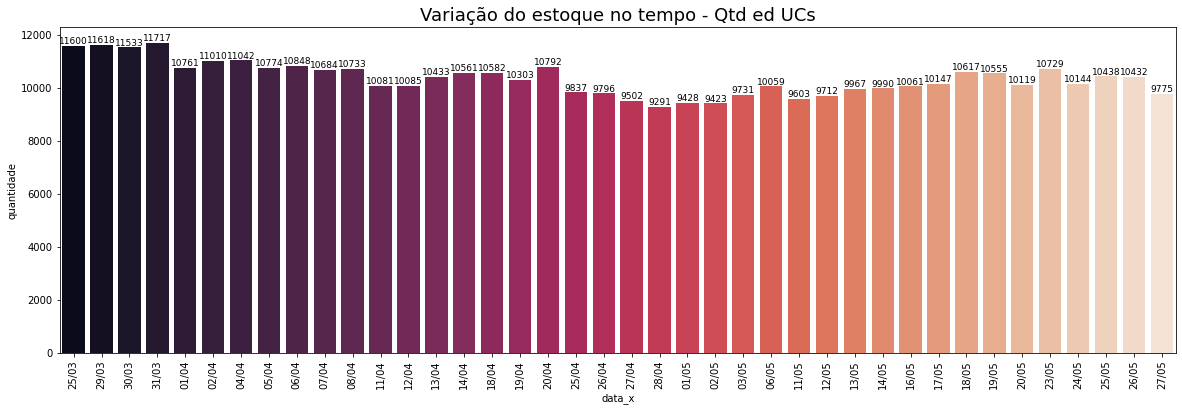

In [18]:
ax = sns.barplot(data=analise_item, x='data_x', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque no tempo - Qtd ed UCs', fontsize = 18)
ax.figure.set_size_inches(20,6)
ax.bar_label(ax.containers[0], size=9)
plt.xticks(rotation=90)
ax=ax

### Gráfico por produto

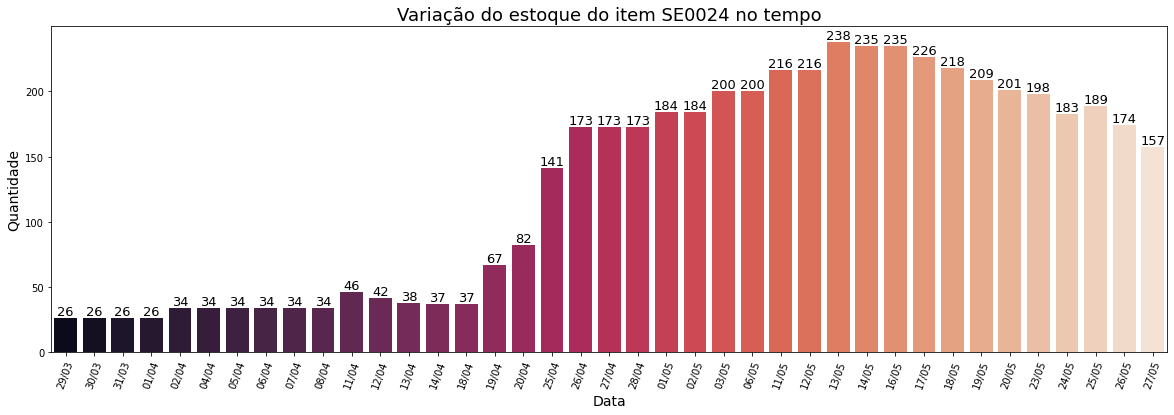

In [19]:
produto = 'SE0024'
query = 'produto == "'+produto+'"'

analise_item = dados_total.query(query)['label_data'].value_counts()
analise_item = analise_item.to_frame().reset_index()
analise_item.rename(columns = {'index':'data', 'label_data':'quantidade'}, inplace =True)
analise_item = analise_item.merge(dados_total, left_on='data', right_on='label_data')
analise_item = analise_item[['data_x', 'quantidade', 'data_y']]
analise_item.sort_values(by='data_y', inplace=True)
ax = sns.barplot(data=analise_item, x='data_x', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque do item ' +produto+' no tempo', fontsize = 18)
ax.figure.set_size_inches(20,6)
ax.bar_label(ax.containers[0], size=13)
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=70)
ax=ax

### Gráfico por tipo de estoque

In [20]:
#Estoque utilização livre 005
#Estoque bloqueado 005
#Estoque utilização livre SA1
#Estoque utilização livre MP1
#Estoque QA 005
#Estoque bloqueado SA1
#Estoque QA MP1
#Estoque utilização livre T01
#Estoque utilização livre S01
#Estoque QA SA1
#Estoque bloqueado S01
#Estoque bloqueado T01

#### Cria as querys de acordo com o tipo de estoque geral (livre, bloqueado, qualidade)

In [21]:
bloqueado = 'tipo_estoque == "Estoque bloqueado 005" | tipo_estoque == "Estoque bloqueado SA1" | tipo_estoque == "Estoque bloqueado S01" | tipo_estoque == "Estoque bloqueado T01"'
livre = 'tipo_estoque == "Estoque utilização livre 005" | tipo_estoque == "Estoque utilização livre SA1" | tipo_estoque == "Estoque utilização livre MP1" | tipo_estoque == "Estoque utilização livre T01" | tipo_estoque == "Estoque utilização livre S01"'
qualidade = 'tipo_estoque == "Estoque QA 005" | tipo_estoque == "Estoque QA MP1" | tipo_estoque == "Estoque QA SA1"'

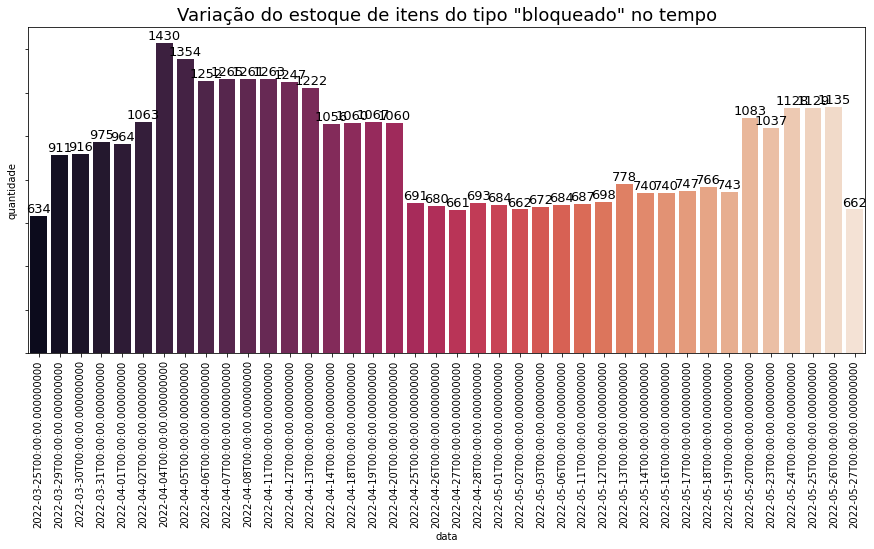

In [22]:
query = bloqueado

if query == qualidade:
    tipo = 'em qualidade'
elif query == livre:
    tipo = 'livre'
else:
    tipo = 'bloqueado'

analise_tipo = dados_total.query(query)['data'].value_counts()
analise_tipo = analise_tipo.to_frame().reset_index()
analise_tipo.rename(columns = {'index':'data', 'data':'quantidade'}, inplace =True)
analise_tipo.sort_values(by='data', inplace=True)

ax = sns.barplot(data=analise_tipo, x='data', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque de itens do tipo "' +tipo+'" no tempo', fontsize = 18)
ax.figure.set_size_inches(15,6)
ax.bar_label(ax.containers[0], size=13)
ax.set_yticklabels([])
plt.xticks(rotation=90)
ax=ax

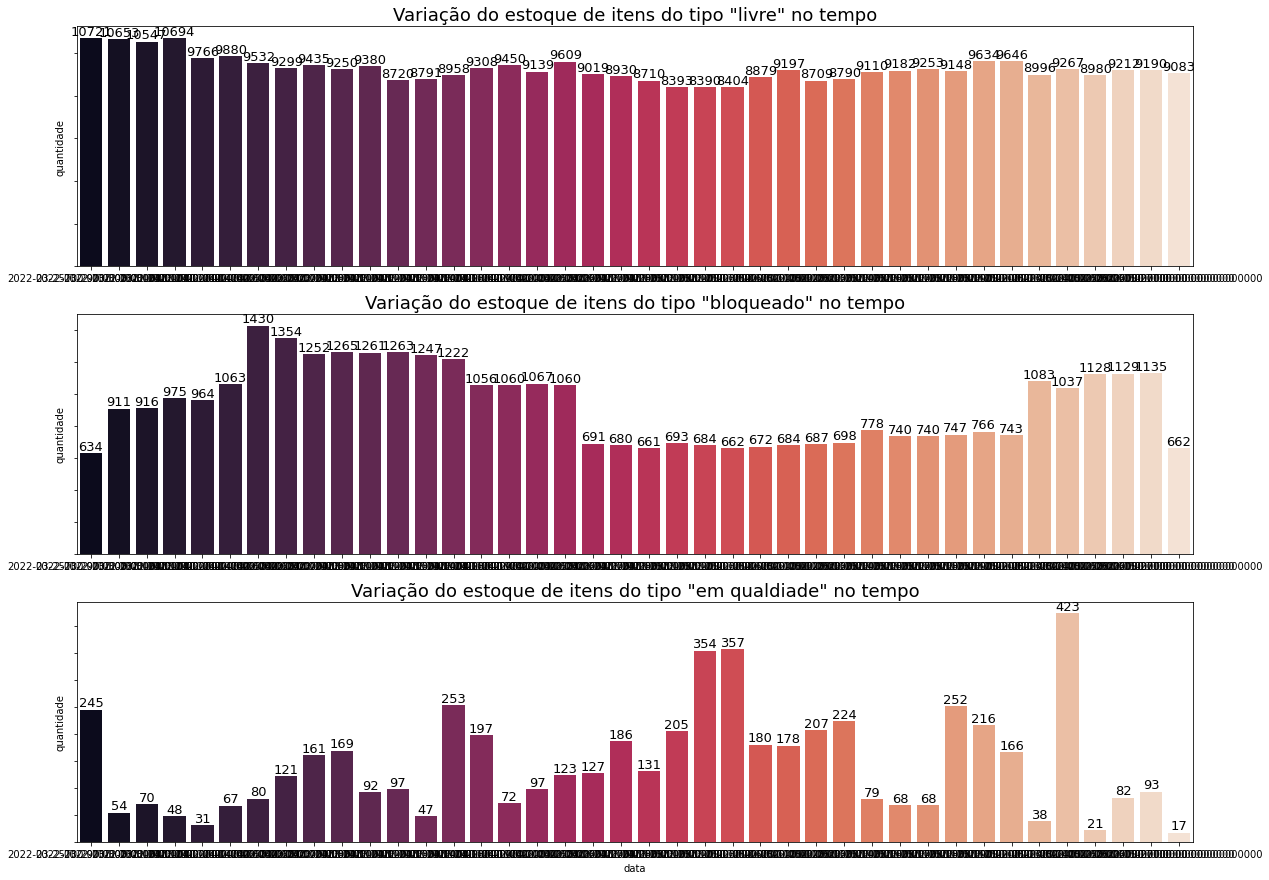

In [23]:
plt.figure(figsize=(20, 15))

ax = plt.subplot(3,1,1)
query = livre

if query == qualidade:
    tipo = 'em qualdiade'
elif query == livre:
    tipo = 'livre'
else:
    tipo = 'bloqueado'

analise_tipo = dados_total.query(query)['data'].value_counts()
analise_tipo = analise_tipo.to_frame().reset_index()
analise_tipo.rename(columns = {'index':'data', 'data':'quantidade'}, inplace =True)
analise_tipo.sort_values(by='data', inplace=True)

ax = sns.barplot(data=analise_tipo, x='data', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque de itens do tipo "' +tipo+'" no tempo', fontsize = 18)
ax.bar_label(ax.containers[0], size=13)
ax.set_yticklabels([])
ax.set_xlabel('')

plt.subplot(3,1,2)
query = bloqueado

if query == qualidade:
    tipo = 'em qualdiade'
elif query == livre:
    tipo = 'livre'
else:
    tipo = 'bloqueado'

analise_tipo = dados_total.query(query)['data'].value_counts()
analise_tipo = analise_tipo.to_frame().reset_index()
analise_tipo.rename(columns = {'index':'data', 'data':'quantidade'}, inplace =True)
analise_tipo.sort_values(by='data', inplace=True)

ax = sns.barplot(data=analise_tipo, x='data', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque de itens do tipo "' +tipo+'" no tempo', fontsize = 18)
ax.bar_label(ax.containers[0], size=13)
ax.set_yticklabels([])
ax.set_xlabel('')

plt.subplot(3,1,3)
query = qualidade

if query == qualidade:
    tipo = 'em qualdiade'
elif query == livre:
    tipo = 'livre'
else:
    tipo = 'bloqueado'

analise_tipo = dados_total.query(query)['data'].value_counts()
analise_tipo = analise_tipo.to_frame().reset_index()
analise_tipo.rename(columns = {'index':'data', 'data':'quantidade'}, inplace =True)
analise_tipo.sort_values(by='data', inplace=True)

ax = sns.barplot(data=analise_tipo, x='data', y='quantidade', palette='rocket')
ax.set_title('Variação do estoque de itens do tipo "' +tipo+'" no tempo', fontsize = 18)
ax.bar_label(ax.containers[0], size=13)
ax.set_yticklabels([])

ax=ax